# Working through the MESA session 2 exercises


In [17]:
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt 
import astropy.units as u
import astropy.constants as const

In [28]:
# Open the history data for each of the runs
f0_hist_data = mr.MesaData('data/session2_M8_no_overshoot/LOGS/history.data')
f025_hist_data = mr.MesaData('data/session2_M8_overshoot0p25/LOGS/history.data')
f05_hist_data = mr.MesaData('data/session2_M8_overshoot0p5/LOGS/history.data')

print(f0_hist_data.bulk_names)

('model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'mix_type_1', 'mix_qtop_1', 'mix_type_2', 'mix_qtop_2', 'mix_type_3', 'mix_qtop_3', 'mix_type_4', 'mix_qtop_4', 'mix_type_5', 'mix_qtop_5', 'mix_type_6', 'mix_qtop_6', 'mix_type_7', 'mix_qtop_7', 'mix_type_8', 'mix_qtop_8', 'mix_type_9', 'mix_qtop_9', 'mix_type_10', 'mix_qtop_10', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lnuc', 'pp', 'cno', 'tri_alfa', 'epsnuc_M_1', 'epsnuc_M_2', 'epsnuc_M_3', 'epsnuc_M_4', 'epsnuc_M_5', 'epsnuc_M_6', 'epsnuc_M_7', 'epsnuc_M_8', 'burn_type_1', 'burn_qtop_1', 'burn_type_2', 'burn_qtop_2', 'burn_type_3', 'burn_qtop_3', 'burn_type_4', 'burn_qtop_4', 'burn_type_5', 'burn_qtop_5', 'burn_type_6', 'burn_qtop_6', 'burn_type_7', 'burn_qtop_7', 'burn_type_8', 'burn_qtop_8', 'burn_type_9', 'burn_qtop_9', 'burn_type_10', 'burn_qtop_10', 'he_core_mass',

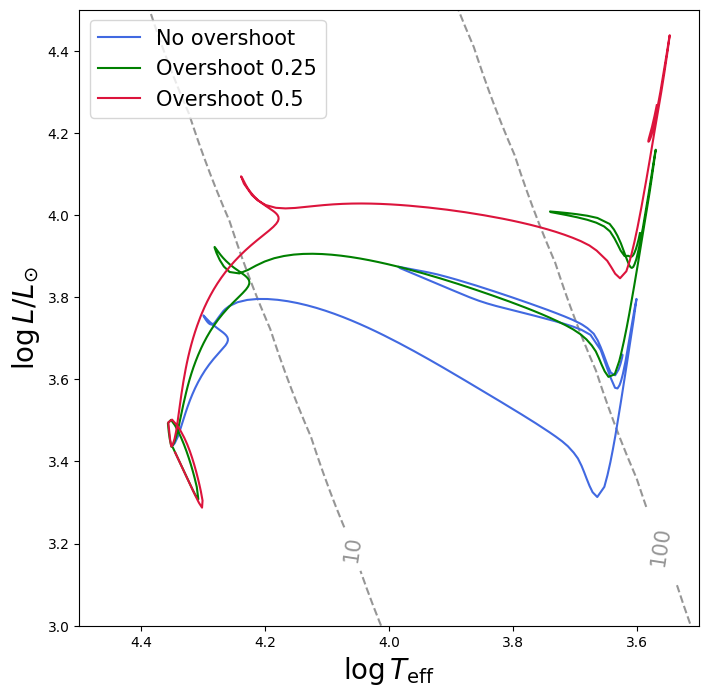

In [82]:
# Relation between L, Teff and R (Stefan-Boltzmann law)
def Radius(Teff, L):
    Teff = Teff*u.K
    L = (L*u.Lsun).to(u.W) #change from Lsun to W
    R = (L/(4*np.pi * const.sigma_sb*Teff**4))**0.5
    return R.to(u.Rsun).value

# Start plotting
fig, ax = plt.subplots(figsize = (8,8))

############
# plot contour lines of constant radius using SB law 
Teffs = np.linspace(1.5, 8, 100)
Ls = np.linspace(2.0, 6.0, 100)
Teffs_grid, Ls_grid = np.meshgrid(Teffs, Ls)# Create a grid 
Radius_grid = Radius(10**Teffs_grid, 10**Ls_grid) # Apply Radius to each pair of Teffs and Ls values
CS = plt.contour(Teffs_grid, Ls_grid, Radius_grid, levels = [1, 10, 100, 1e3, 1e4],
            colors='#969696', linestyles='dashed')
plt.clabel(CS, inline=1, inline_spacing = -5, fontsize=15,
           manual = [(4.5, 3.2), (3.9, 3.2), (3.5, 3.2), (2.5, 3.2), (1.5, 3.1)] )
##########

##########
# Select the data to plot
for histdata, label, marker, colors in zip([f0_hist_data, f025_hist_data, f05_hist_data],
                                 ['No overshoot', 'Overshoot 0.25', 'Overshoot 0.5'],
                                 ['o', '*', 'd'],
                                 ['royalblue', 'green', 'crimson']):
                                #  ['Blues', 'Greens', 'Reds']):
    plt.plot(histdata.log_Teff, histdata.log_L, label = label,  #marker = marker,
                color = colors)
                # c = histdata.center_he4, cmap = colors, vmin = 0, vmax =1)
    # plt.colorbar(label = 'Center He4')


# Flip the x-axis
plt.xlim(3.5,4.5)
plt.ylim(3,4.5)
plt.gca().invert_xaxis()
plt.legend(fontsize = 15)
plt.xlabel('$\log T_{\mathrm{eff}}$', fontsize = 20)
plt.ylabel('$\log L/L_{\odot}$', fontsize = 20)
plt.savefig('plots/HR_diagram_overshoot.png', bbox_inches = 'tight')
plt.show()

We see that higher overshoot leads to brighter stars! This is because you effectively have a larger core to burn through. 

# $\rho_c - T_c$ diagram

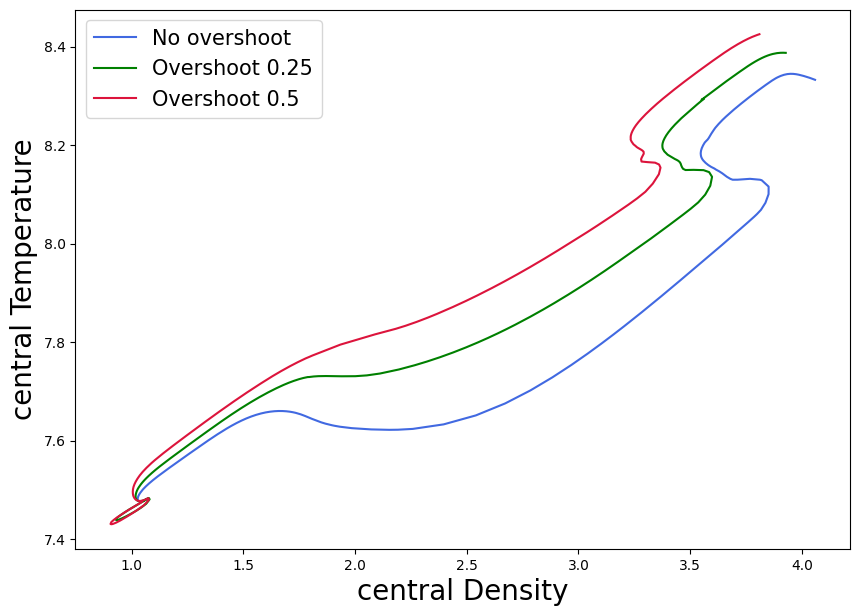

In [71]:
fig, ax = plt.subplots(figsize = (10,7))

##########
# Select the data to plot
for histdata, label, colors in zip([f0_hist_data, f025_hist_data, f05_hist_data],
                                 ['No overshoot', 'Overshoot 0.25', 'Overshoot 0.5'],
                                 ['royalblue', 'green', 'crimson']):
    plt.plot(histdata.log_center_Rho, histdata.log_center_T, label = label, color = colors)

# 'log_center_T', 'log_center_Rho',
plt.legend(fontsize = 15)
plt.xlabel("central Density", fontsize = 20 )
plt.ylabel("central Temperature", fontsize = 20 )
plt.savefig('plots/rho_T_diagram_overshoot.png', bbox_inches = 'tight')
plt.show()

We note that higher overshoot leads to hotter central temperatures at a fixed value for the central density. We can thus expect more energy to be generated in the core, which in turn can increase the Luminosity.

# Central helium aundance 

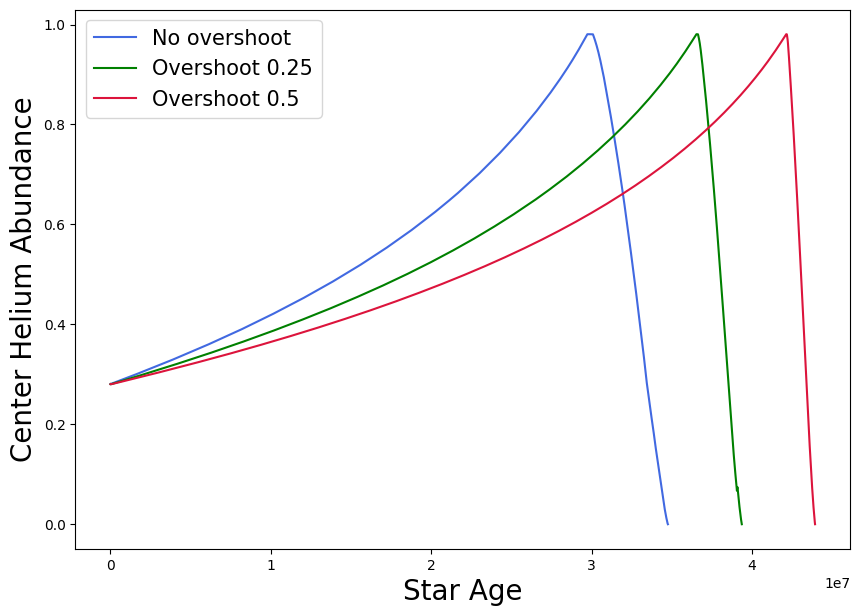

In [72]:

fig, ax = plt.subplots(figsize = (10,7))

##########
# Select the data to plot
for histdata, label, colors in zip([f0_hist_data, f025_hist_data, f05_hist_data],
                                 ['No overshoot', 'Overshoot 0.25', 'Overshoot 0.5'],
                                 ['royalblue', 'green', 'crimson']):
    plt.plot(histdata.star_age, histdata.center_he4, label = label, color = colors)

# 'log_center_T', 'log_center_Rho',
plt.legend(fontsize = 15)
plt.xlabel("Star Age", fontsize = 20 )
plt.ylabel("Center Helium Abundance", fontsize = 20 )
plt.savefig('plots/central_He.png', bbox_inches = 'tight')
plt.show()

We note that the stars with high overshoot live longer: again we can interpret this as the stars having more fuel available (they effectively have a larger core mass). 

## How do the MS and He burning lifetimes change with overshooting? 

In [107]:
############################
def get_lifetime(hist_data):
# Main sequece mask
    ms_mask = hist_data.center_h1 > 1e-4
    # Select the last age where the star is still on the main sequence
    ms_lifetime = hist_data.star_age[ms_mask][-1]
    return ms_lifetime

ms_lifetime_no_overshoot = get_lifetime(f0_hist_data)
ms_lifetime_overshoot_025 = get_lifetime(f025_hist_data)
ms_lifetime_overshoot_05 = get_lifetime(f05_hist_data)

print(f"Main sequence lifetime for no overshoot: {ms_lifetime_no_overshoot*1e-6} Myr")
print("fractional increase of MS lifetime $t_{MS, 0.25}/t_{MS, 0}$", ms_lifetime_overshoot_025/ms_lifetime)
print("fractional increase of MS lifetime $t_{MS, 0.5}/t_{MS, 0}$", ms_lifetime_overshoot_05/ms_lifetime)

#

Main sequence lifetime for no overshoot: 29.721111916853726 Myr
fractional increase of MS lifetime $t_{MS, 0.25}/t_{MS, 0}$ 1.2285560566684732
fractional increase of MS lifetime $t_{MS, 0.5}/t_{MS, 0}$ 1.4168528882076603


In [110]:
###########################
# Helium burning time
def get_he_burning_time(hist_data):
    verbose = False
    # Select the first age where central helium abundance drops below primordial 
    # assuming X = 0.7 and Z = 0.02
    he_burn_start_mask = hist_data.center_he4 < 0.28
    he_burn_start = hist_data.star_age[he_burn_start_mask][0] 
    if verbose:
        print(f"He burning starts at {he_burn_start*1e-6} Myr")
    # Select the last age where the star is still burning helium in the core
    he_core_exhaust_mask = hist_data.center_he4 < 1e-4
    he_burn_end = hist_data.star_age[he_core_exhaust_mask][-1] 
    if verbose:
        print(f"He burning ends at {he_burn_end*1e-6} Myr")
    he_burn_time = he_burn_end - he_burn_start
    if verbose:
        print(f"He burning lifetime for no overshoot: {he_burn_time*1e-6} Myr")
    return he_burn_time

he_burn_time_no_overshoot = get_he_burning_time(f0_hist_data)
he_burn_time_overshoot_025 = get_he_burning_time(f025_hist_data)
he_burn_time_overshoot_05 = get_he_burning_time(f05_hist_data)

print(f"He core burning lifetime for no overshoot: {he_burn_time_no_overshoot*1e-6} Myr")
print("fractional increase of He burning lifetime $t_{He, 0.25}/t_{He, 0}$", he_burn_time_overshoot_025/he_burn_time_no_overshoot)
print("fractional increase of He burning lifetime $t_{He, 0.5}/t_{He, 0}$", he_burn_time_overshoot_05/he_burn_time_no_overshoot)



He core burning lifetime for no overshoot: 1.2744605538565703 Myr
fractional increase of He burning lifetime $t_{He, 0.25}/t_{He, 0}$ 0.6223084478442469
fractional increase of He burning lifetime $t_{He, 0.5}/t_{He, 0}$ 0.3962901744580356


We see above that although the main sequence lifetime increases, the He burning time decreases. 
